In [27]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(igraph)
library(gapmap)

In [28]:
dfv5 <- read_tsv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region5.tsv')
dfv3 <- read_tsv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region3.tsv')

#dft <- read_tsv('../Data/MatrixPathwaysTop15_time.tsv')


#rownames_dft <- dft$'function'
rownames_dfv5 <- dfv5$'function'
rownames_dfv3 <- dfv3$'function'

#mat_t <- as.matrix(dft) 
mat_v5 <- as.matrix(dfv5)
mat_v3 <- as.matrix(dfv3)

#mat_t <- mat_t[, -1]
mat_v5 <- mat_v5[, -1]
mat_v3 <- mat_v3[, -1]

#colnames_dft = colnames(mat_t)
colnames_dfv5 = colnames(mat_v5)
colnames_dfv3 = colnames(mat_v3)


mat_v5 <- matrix(as.numeric(mat_v5), nrow=nrow(mat_v5), ncol=ncol(mat_v5))
mat_v3 <- matrix(as.numeric(mat_v3), nrow=nrow(mat_v3), ncol=ncol(mat_v3))
#mat_t <- matrix(as.numeric(mat_t), nrow=nrow(mat_t), ncol=ncol(mat_t))


rownames(mat_v5) <- rownames_dfv5
rownames(mat_v3) <- rownames_dfv3

#rownames(mat_t) <- rownames_dft

colnames(mat_v5) <- colnames_dfv5
colnames(mat_v3) <- colnames_dfv3

#rownames(mat_v) <- rownames_dfv
#colnames(mat_t) <- colnames_dft

head(mat_v5)

Rows: 51 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): function
dbl (38): 19A, 19B, 20A, 20B, 20C, 20D, 20E, 20F, 20G, 20H, 20I, 20J, 21A, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 77 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): function
dbl (38): 19A, 19B, 20A, 20B, 20C, 20D, 20E, 20F, 20G, 20H, 20I, 20J, 21A, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,19A,19B,20A,20B,20C,20D,20E,20F,20G,20H,⋯,22D,22E,22F,23A,23B,23C,23D,23E,23F,recombinant
Desarrollo de sistema,NA,NA,NA,21,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Desarrollo de tubo,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,20,20,NA,NA,NA,NA,13,NA,10
Fosforilación,NA,NA,10,25,NA,28,15,11,11,15,⋯,NA,22,21,NA,14,25,NA,NA,15,10
Fosforilación de proteinas,19,19,19,48,18,51,30,22,22,28,⋯,31,40,37,27,29,47,17,23,28,20
Metabolismo de nitrógeno,9,NA,NA,23,NA,31,17,11,NA,17,⋯,21,24,22,16,14,27,NA,13,13,NA
Morfogénesis,NA,10,NA,NA,10,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,9,NA,NA,NA


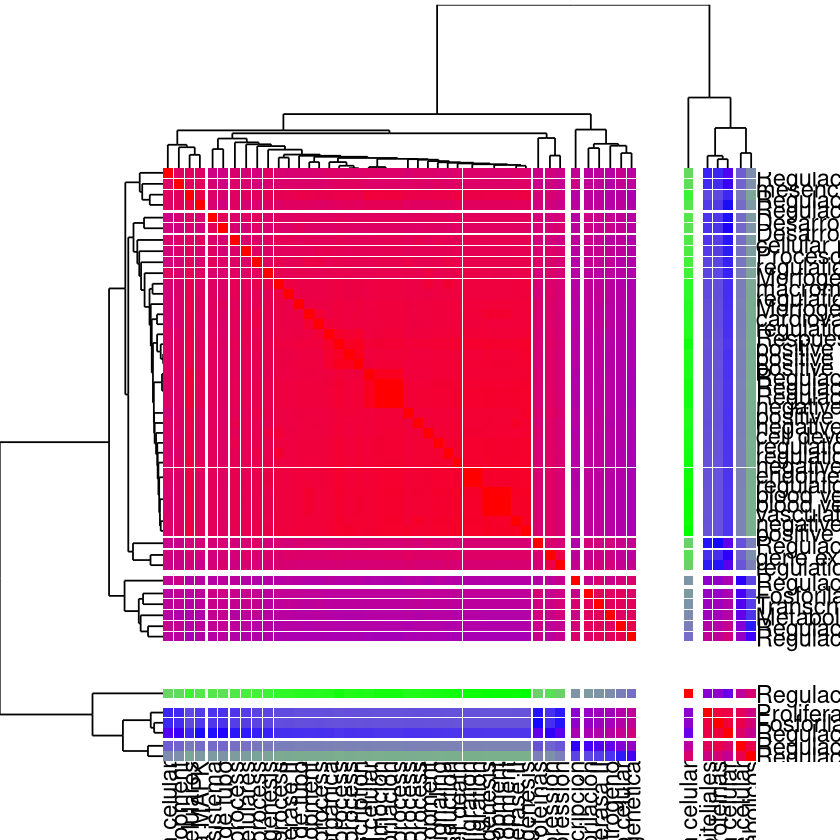

In [22]:

mat_v5[is.na(mat_v5)] <- 0
data <- mat_v5
dist_data <- dist(data, method = "euclidean", diag = TRUE, upper = TRUE)
hc <- hclust(dist_data, method = "complete")
dend <- as.dendrogram(hc)

grey_scale <- c("red", "blue", 'green')
gapmap(m = as.matrix(dist_data), d_row = rev(dend), d_col = dend, col = grey_scale)




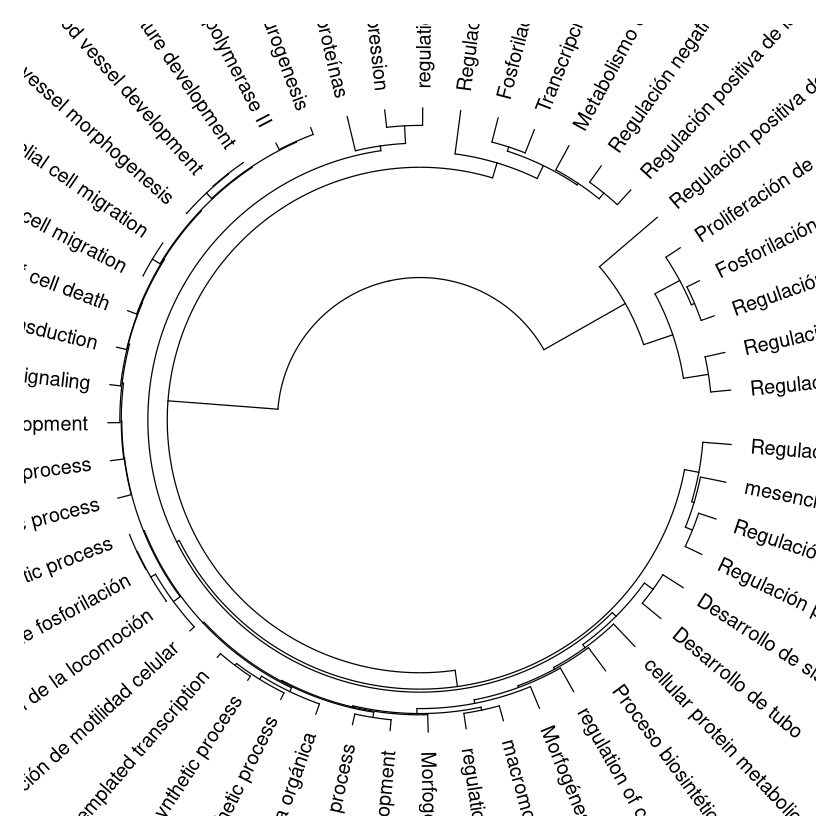

In [25]:
library(dendextend)
library(circlize)
circlize_dendrogram(dend, labels_track_height = 0.1, dend_track_height = 0.5)


In [60]:
mat_v5[is.na(mat_v5)] <- 0
#mat_t[mat_t == 0] <- NA

promedios <- apply(mat_v5, 1, mean) 
indices <- order(promedios, decreasing = TRUE)[1:15]
m5 <- mat_v5[indices, ]


options(repr.plot.width = 13, repr.plot.height = 7)
pdf("../../Plots/HeatmapVariants5.pdf", width = 13, height = 7)
htv <- Heatmap(m5, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 40, 2, 2), "mm"))
dev.off()

png 
  2

In [61]:
mat_v3[is.na(mat_v3)] <- 0
#mat_t[mat_t == 0] <- NA

promedios <- apply(mat_v3, 1, mean) 
indices <- order(promedios, decreasing = TRUE)[1:15]
m3 <- mat_v3[indices, ]

options(repr.plot.width = 13, repr.plot.height = 7)
pdf("../../Plots/HeatmapVariants3.pdf", width = 13, height = 7)
htv <- Heatmap(m3, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 30, 2, 2), "mm"))
dev.off()

png 
  2

In [29]:
dfv5 <- read_tsv('../../Data/MatrixOutliersVariants_5.tsv')
dfv3 <- read_tsv('../../Data/MatrixOutliersVariants_3.tsv')



rownames_dfv5 <- dfv5$...1
rownames_dfv3 <- dfv3$...1

#mat_t <- as.matrix(dft) 
mat_v5 <- as.matrix(dfv5)
mat_v3 <- as.matrix(dfv3)

#mat_t <- mat_t[, -1]
mat_v5 <- mat_v5[, -1]
mat_v3 <- mat_v3[, -1]

#colnames_dft = colnames(mat_t)
colnames_dfv5 = colnames(mat_v5)
colnames_dfv3 = colnames(mat_v3)


mat_v5 <- matrix(as.numeric(mat_v5), nrow=nrow(mat_v5), ncol=ncol(mat_v5))
mat_v3 <- matrix(as.numeric(mat_v3), nrow=nrow(mat_v3), ncol=ncol(mat_v3))
#mat_t <- matrix(as.numeric(mat_t), nrow=nrow(mat_t), ncol=ncol(mat_t))


rownames(mat_v5) <- rownames_dfv5
rownames(mat_v3) <- rownames_dfv3

#rownames(mat_t) <- rownames_dft

colnames(mat_v5) <- colnames_dfv5
colnames(mat_v3) <- colnames_dfv3

#rownames(mat_v) <- rownames_dfv
#colnames(mat_t) <- colnames_dft

head(mat_v5)

New names:
• `` -> `...1`
Rows: 48 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ...1
dbl (8): 20B, 20D, 21H, 21I, 22B, 22E, 22F, 23C

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 47 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (22): 20A, 20B, 20C, 20D, 20E, 20G, 21C, 21D, 21E, 21F, 21H, 21I, 21J, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,20B,20D,21H,21I,22B,22E,22F,23C
Desarrollo de organismos multicelulares,NA,21,21,23,NA,NA,NA,NA
Desarrollo de sistema,21,24,23,27,NA,NA,NA,NA
Desarrollo de tubo,NA,24,24,27,NA,NA,NA,NA
Desarrollo glandular,NA,22,NA,24,NA,NA,NA,NA
Fosforilación,25,28,25,29,NA,NA,NA,25
Fosforilación de proteinas,NA,73,NA,74,NA,NA,NA,NA


In [30]:
mat_v5[is.na(mat_v5)] <- 0
mat_v3[is.na(mat_v3)] <- 0

In [33]:
options(repr.plot.width = 12, repr.plot.height = 8)
pdf("../../Plots/HeatmapVariants5_outliers.pdf", width = 12, height = 8)
htv <- Heatmap(mat_v5, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 50, 2, 2), "mm"))
dev.off()

png 
  2

In [55]:

options(repr.plot.width = 15, repr.plot.height = 8)
pdf("../../Plots/HeatmapVariants3_outliers.pdf", width = 15, height = 8)
htv <- Heatmap(mat_v3, col = viridis(10), name = 'miRNA', row_names_side = "left", row_dend_side = "right")
draw(htv, padding = unit(c(2, 95, 2, 2), "mm"))
dev.off()

png 
  2

In [56]:
matriz1 <- mat_v5
matriz2 <- mat_v3

filas1 <- rownames(matriz1)
filas2 <- rownames(matriz2)

# Encontrar las filas que faltan en cada matriz
filas_faltantes1 <- setdiff(filas2, filas1)
filas_faltantes2 <- setdiff(filas1, filas2)

# Crear matrices con las filas faltantes y valores NA
matriz_faltantes1 <- matrix(NA, nrow = length(filas_faltantes1), ncol = ncol(matriz1))
rownames(matriz_faltantes1) <- filas_faltantes1
colnames(matriz_faltantes1) <- colnames(matriz1)

matriz_faltantes2 <- matrix(NA, nrow = length(filas_faltantes2), ncol = ncol(matriz2))
rownames(matriz_faltantes2) <- filas_faltantes2
colnames(matriz_faltantes2) <- colnames(matriz2)

# Añadir las filas faltantes a las matrices originales
matriz1 <- rbind(matriz1, matriz_faltantes1)
matriz2 <- rbind(matriz2, matriz_faltantes2)

# Ordenar las matrices por los nombres de las filas
matriz1 <- matriz1[order(rownames(matriz1)), ]
matriz2 <- matriz2[order(rownames(matriz2)), ]

In [57]:
matriz1[is.na(matriz1)] <- 0
matriz2[is.na(matriz2)] <- 0

matriz1

,20B,20D,21H,21I,22B,22E,22F,23C
anatomical structure formation involved in morphogenesis,0,0,0,21,0,0,0,0
anoikis,0,0,0,0,0,0,0,0
biosynthetic process,0,22,0,22,0,0,0,0
cardiovascular system development,0,0,0,22,0,0,0,0
cell development,0,0,0,22,0,0,0,0
cell projection organization,0,0,0,0,0,0,0,0
cell-cell signaling by wnt,0,0,0,0,0,0,0,0
cellular response to extracellular stimulus,0,0,0,0,0,0,0,0
cellular response to nutrient levels,0,0,0,0,0,0,0,0
cellular response to peptide hormone stimulus,0,0,0,0,0,0,0,0


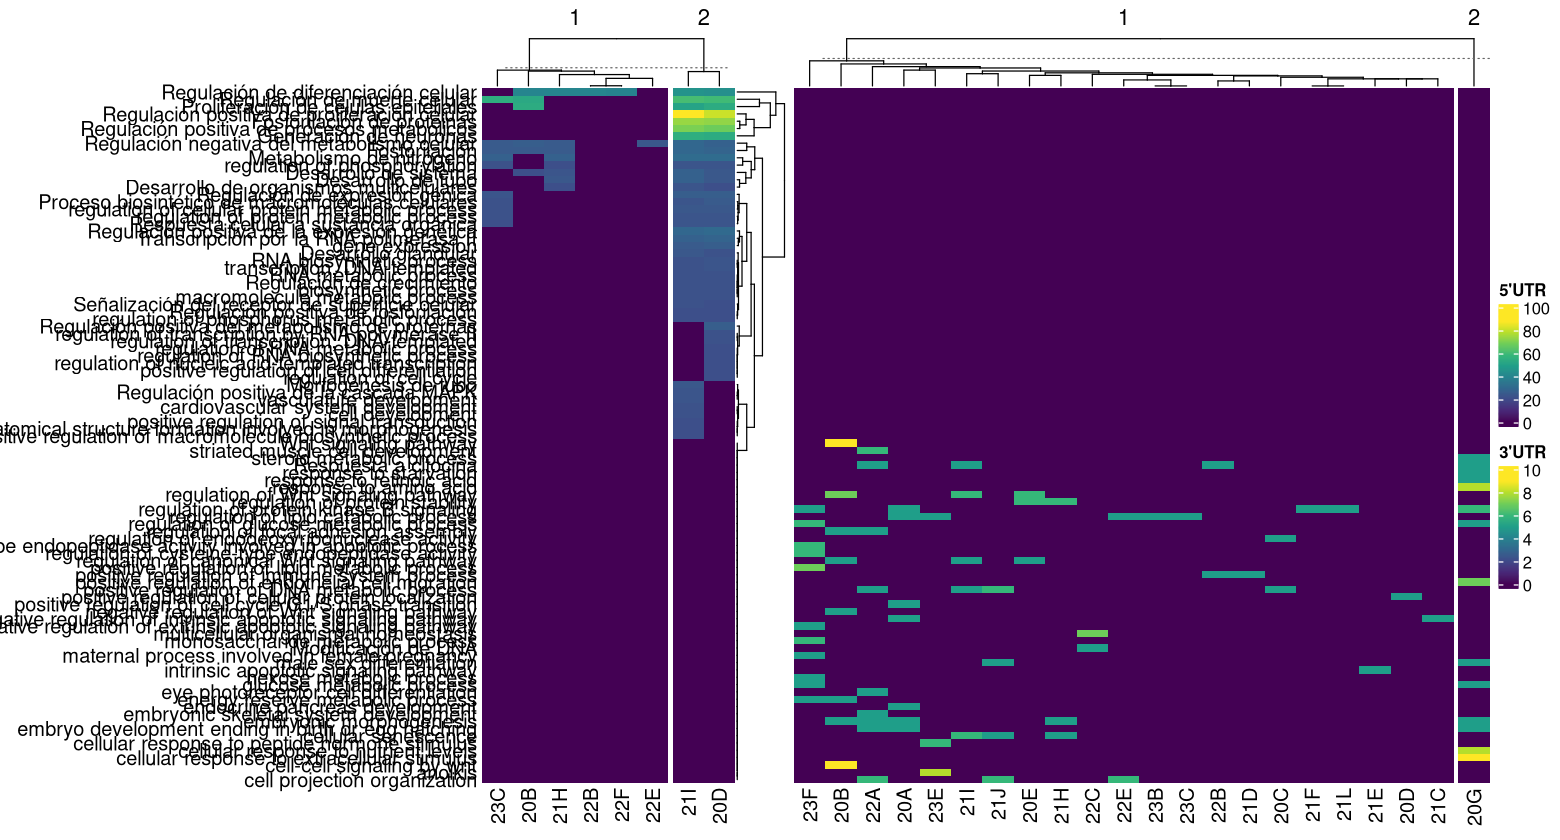

In [58]:

options(repr.plot.width = 13, repr.plot.height = 7)
#pdf("../../Plots/HeatmapVariants5.pdf", width = 13, height = 7)
htv5 <- Heatmap(matriz1, col = viridis(10), name = "5'UTR", row_names_side = "left", row_dend_side = "right", 
         column_km = 2)


htv3 <- Heatmap(matriz2, col = viridis(10), name = "3'UTR", row_names_side = "left", row_dend_side = "right", 
        column_km = 2)        


draw(htv5 + htv3, padding = unit(c(2, 40, 2, 2), "mm"))


#dev.off()